importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import home_dataset.csv


In [15]:

from google.colab import files
import io

# 1. Upload the file
uploaded = files.upload()

# 2. Get the filename dynamically (fixes the FileNotFoundError)
filename = list(uploaded.keys())[0]

# 3. Load the data
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"Successfully loaded: {filename}")
df.head()




Saving home_dataset.csv to home_dataset (1).csv
Successfully loaded: home_dataset (1).csv


,HouseSize,HousePrice
0,793,1300000
1,2477,3700000
2,1263,1480000
3,1291,2380000
4,603,955000


train data and Showing size vs price

Your file contains these columns: ['HouseSize', 'HousePrice']
Using 'HouseSize' for Size and 'HousePrice' for Price.


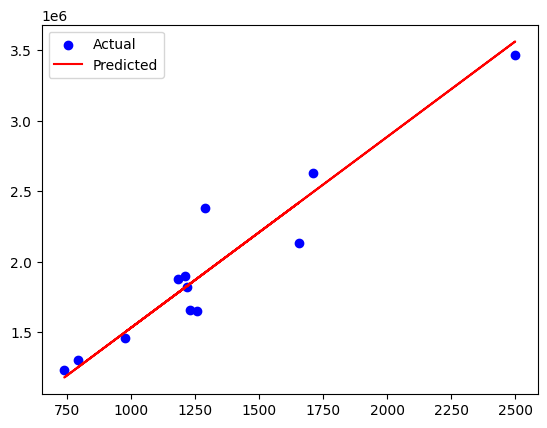

In [24]:

print("Your file contains these columns:", df.columns.tolist())


try:
    size_col = [c for c in df.columns if 'size' in c.lower() or 'area' in c.lower()][0]
    rent_col = [c for c in df.columns if 'rent' in c.lower() or 'price' in c.lower() or 'medv' in c.lower()][0]
    print(f"Using '{size_col}' for Size and '{rent_col}' for Price.")
except IndexError:

    size_col = df.columns[0]
    rent_col = df.columns[1]
    print(f"Auto-selected first two columns: '{size_col}' and '{rent_col}'")


house_sizes = df[size_col].values
house_prices = df[rent_col].values


x_train, x_test, y_train, y_test = train_test_split(house_sizes, house_prices, test_size=0.2, random_state=42)
x_train, x_test = x_train.reshape(-1, 1), x_test.reshape(-1, 1)

model = LinearRegression().fit(x_train, y_train)
prediction = model.predict(x_test)

plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, prediction, color='red', label='Predicted')
plt.legend()
plt.show()


